# COGS 108 - Final Project 

# Overview

The projects seeks to evaluate the effectiveness of the current food handling accreditation program employed by the County of San Diego where food handlers must possees a valid food handler card and pass necessary training. It does so by evaluating the extent in which food handlers who are not accredited by the program, and its effect on the food safety violations found in restaurants in San Diego. We will do so by assessing the relationship between food handler violation percentage, which quantifies the food handlers that were inspected who were not accredited, and food safety violation percentage, which quantifies the level of violations that were found in restaurants that were inspected. Results conclude that there is a significant relationship between handler violation percentage and safety violation percentage, which would suggest that the San Diego food handling program is successful in reducing the number of food safety violations in restaurants.

# Name & PID

- Name: James Li
- PID: A15665125

# Research Question

Is there a relationship between food handler violation percentage and food safety violation percentage in the County of San Diego?

# Background and Prior Work

In the County of San Diego, all food workers and handlers are required to pass a food-handler test and receive food handling accreditation. Food handlers can receive a valid food handler card either by attending a county-authorized food handler training school, or passing a County of San Diego food handler test. Workers without a valid food handler card cannot work in a food establishment. These food handler cards are valid for 3 years. If a worker wishes to renew their card after its expiration, they must complete a 3 hour training course and pass an exam administered by a food handler training school. The courses and exam cover neccessary food handling knowledge including how to safely handle, prepare, and store food, and practice proper hygiene. However, many people believe food handling accreditation programs are ineffective. More often than not, food safety violations are practiced not because of a lack of knowledge, but a lack of concern. People who prepare food dangerously almost always know the right and safe way to prepare food, but instead chose the easy way out. It can be argued that an assesssment of whether food handlers know the correct way to safely prepare food actually does nothing to lower the amount of food unsafetiness. It begs the question of whether food handlers being accredited actually does anything to prevent the number of food safety violations. To measure this food unsafetiness, we can look to the routine inspections done annually by the Food and Housing Division of the County of San Diego, Department of Environmental Health (FHD). State statistics are a relatively objective source and we can measure food safetiness based on the number of safety violations infringed by restaurants, which is released publically by the FHD. Since a different number of inspections is done per month, we should instead use a measure of percentage of food safety inspections that have violations. Likewise, to measure the extent to which food handlers are accredited, we can look to the number of food handler inspection violations, which is also a statistic released publically by the FHD. This statistic measures how many workers at a given restaurant do not have a valid food handler card. Since a different number of food handler inspections is done every month, we should again instead look to percentage of food handler inspections that have violations.

Even though the County of San Diego seems to collect information on both food handler violations and food safety violations, no prior work was done investigating the relationship between the two in the county. However, similar evaluations have been done in other areas. There has been studies in the past investigating the efficacy of food handler programs with regards to the level of food safety behavior demonstrated by food handlers. In a study written by the Institute of Food Technologies, it was found that, "knowledge was seen to have a significant increase after training, but no significant changes in behavior were observed after training was given" (1). This study seems to support the view that food handler programs would have little to no effect on reducing the number of food safety violations at restaurants. This view is further reinforced by another study conducted in the journal Nutrition Research and Practice, which states, "employee knowledge...showed a significant improvement in their score, increasing from 49.3 before the training to 66.6 after training (but) in terms of employee practices and the sanitation performance, there were no significant increases after the training. (2)" As a result of these two studies, there is reason to believe that food handler training has no effect on the number of food health violations at restaurants, which would suggest that we should find no significant relationship between the percentage of food handler violations and the percentage of food safety violations in San Diego County.

References (include links):
- 1)https://onlinelibrary.wiley.com/doi/full/10.1111/1750-3841.14628
- 2)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2830416/

# Hypothesis


I believe there is be no significant relationship between food handler violation percentage and food safety violation percentage in the County of San Diego. While food handler training improves knowledge of food safety, the knowledge does not translate to actual behavioral change to decrease safety violations.

# Dataset(s)

Even though the dataset of food inspections is supposed to be public, they require permission requests, which I did not have the foresight to request beforehand. As a result, to makedo, I will be using a sample of food inspections collected by FHD from 2011 to 2016 which have been made public from a person who had gained access in the past. The County of San Diego has released the number of monthly food handler inspection violations since 2015 and we will be using that dataset. A problem we will have to deal with is data cleaning because our data only coincides from the period 2015 to 2016.

- Dataset Name: Department of Environmental Health Food Handler Cards
- Link to the dataset: https://data.sandiegocounty.gov/dataset/Department-of-Environmental-Health-Food-Handler-Ca/jpqs-ratr
- Number of observations: 63

Dataset contains the monthly number of food handler inspection violations from January of 2015 to March of 2020. Data includes the number of total food handler inspections and number of food handler violations that were not accredited.

- Dataset Name: Sample of Food Inspections in the County of San Diego
- Link to the dataset: https://github.com/dannguyen/foodhealthinspectiondata/blob/master/data/us/ca/cities/san_diego/samples/inspections.csv
- Number of observations: 999

Dataset contains a random sample of food inspections conducted by FHD from 2011 to 2016. Dataset details score of inspection, with full score being 100, and violation detracting from that score.

I will be combining the two datasets on a basis of the month of the inspection.

# Setup

In [89]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind, chisquare, normaltest

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Data Cleaning

The data is not very clean because a lot of inspections do not have a score, which means violations were not evaluated. We would have to remove invalid entries of inspections. We would also have to remove the inspections during time periods in which we do not have data about food handler violations.

In [90]:
# Read csv
safety = pd.read_csv('https://raw.githubusercontent.com/dannguyen/foodhealthinspectiondata/master/data/us/ca/cities/san_diego/samples/inspections.csv')
handler = pd.read_csv('Department_of_Environmental_Health_Food_Handler_Cards.csv')

In [91]:
# Remove entries before 2015
safety = safety[safety.date >= 20150001]
# Remove unneeded columns
safety = safety.drop(['business_id','description','result','type'], axis=1)
# Remove NaN scores
safety = safety.dropna()

In [92]:
# Violation if score not 100
safety['violation'] = safety.score != 100
# Drop day in date
safety['date'] = safety['date'] / 100
safety['date'] = safety['date'].astype(int)
# Drop score
safety = safety.drop(['score'], axis=1)

We group the inspections by month, and calculate the number of violations and inspections that occur monthly from January of 2015. Remember that the dataset we are using details raw inspections. We have to calculate the percentages of food inspections that turn out to be violations ourselves.

In [93]:
# Group by date
df = safety.groupby(safety['date'],as_index=False).sum()
df['inspection'] = safety.groupby(safety['date'],as_index=False).count()['violation']
df['safety_violation_percentage'] = df['violation'] / df['inspection'] * 100
df = df.drop(['violation','inspection'], axis=1)

The dates are formatted differently in the handler dataset. We have to clean them up a bit. Like inspections, the number of food handler inspections and violations are given as numbers, so we need to transform them into percentages.

In [94]:
# Helper to clean up handler violation dates
def clean_date(date):
    string = date[6:10] + date[0:2]
    return int(string)

In [95]:
# Clean dates
handler = handler[['Date','Food Handler Inspections','Inspections with Food Handler Violations']]
handler['Date'] = handler['Date']
handler['Date'] = handler['Date'].apply(clean_date)

# Calculate percentage
handler['percentage'] = handler['Inspections with Food Handler Violations'] / handler['Food Handler Inspections'] * 100
# Drop any date past May of 2016
handler = handler[handler.Date <= 201605]

In [96]:
df['handler_violation_percentage'] = handler['percentage']

Our resulting data after cleaning and transformation.

In [97]:
df = df[['date','handler_violation_percentage','safety_violation_percentage']]
df

,date,handler_violation_percentage,safety_violation_percentage
0,201501,14.313160,85.714286
1,201502,14.763352,92.857143
2,201503,10.147783,76.470588
3,201504,7.505361,47.058824
4,201505,10.150044,57.142857
5,201506,14.270941,88.888889
6,201507,13.483146,80.000000
7,201508,12.010444,100.000000
8,201509,7.644306,85.714286
9,201510,9.077947,61.904762


To check if we can do linear regression, we need to check the following for our distribution:
- Linear Relationship
- Multivariate Normality
- No multicollinearity
- No auto-correlation
- Homoscedasticity

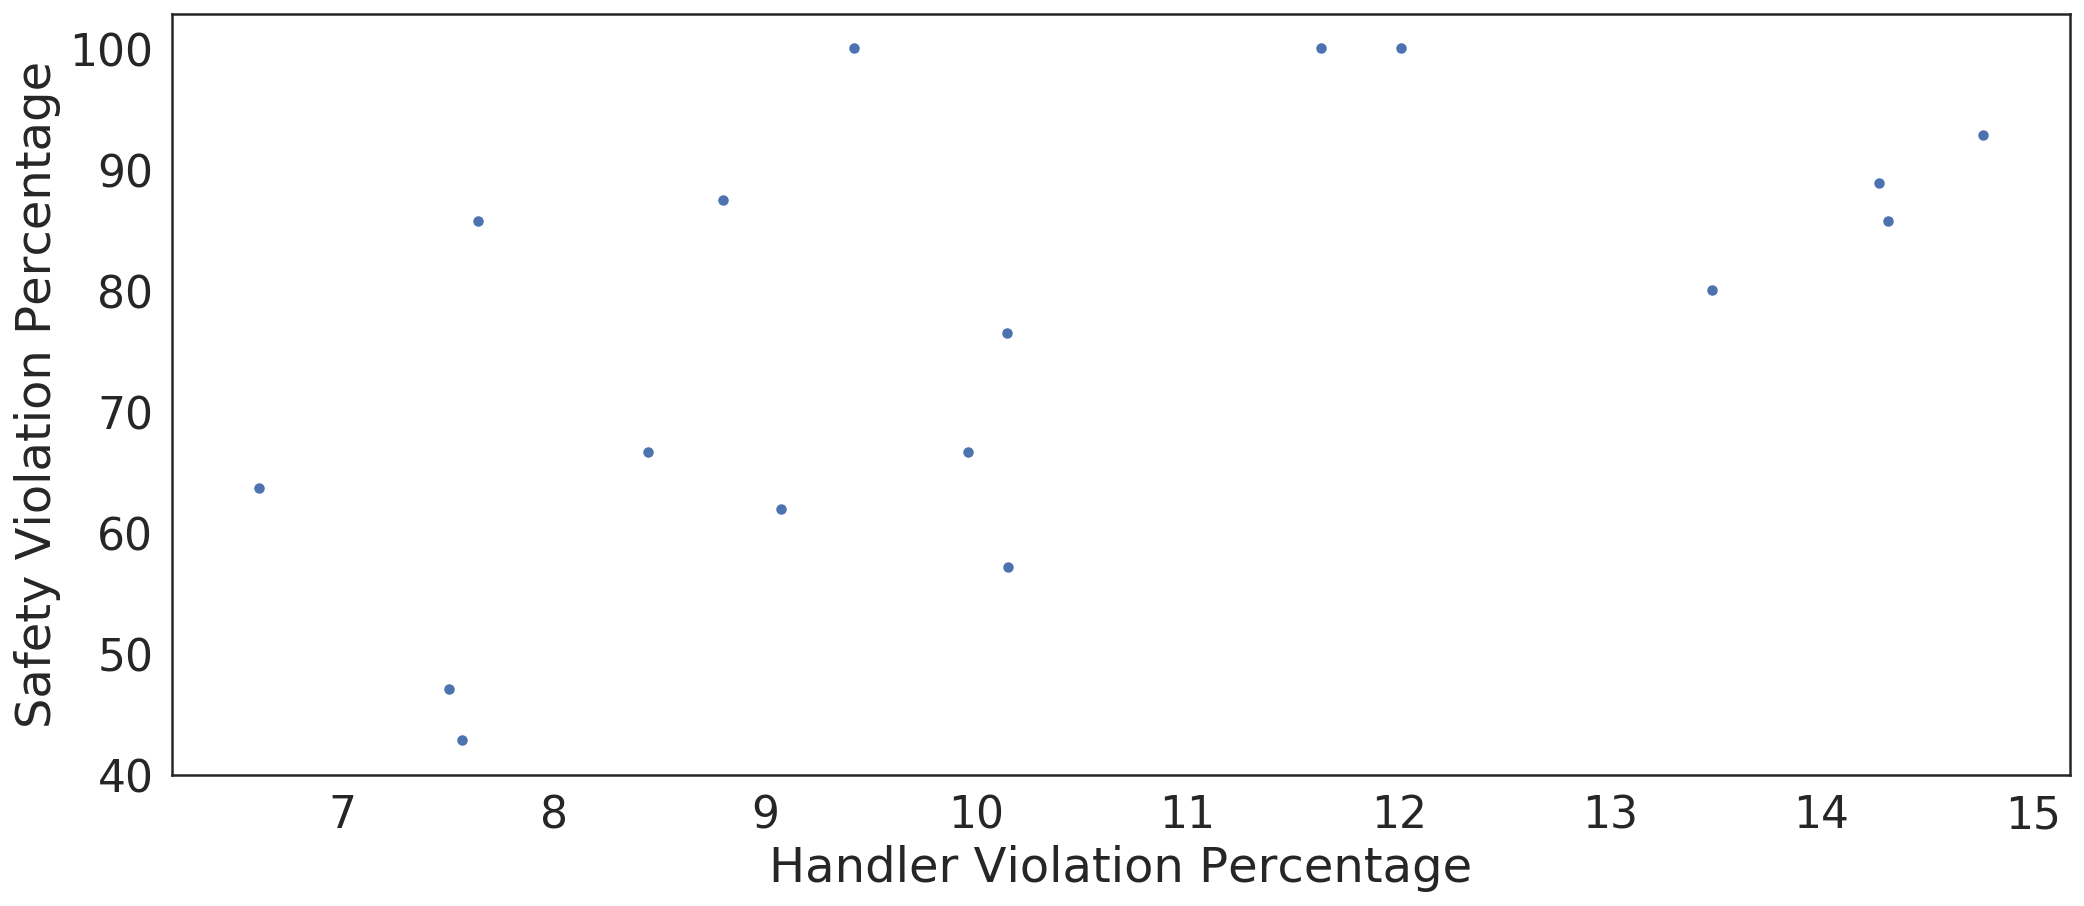

In [98]:
sns.scatterplot(x=df['handler_violation_percentage'],y=df['safety_violation_percentage'])
plt.xlabel('Handler Violation Percentage')
plt.ylabel('Safety Violation Percentage');

Appears to be a linear relationship as well as not homoscedastic.

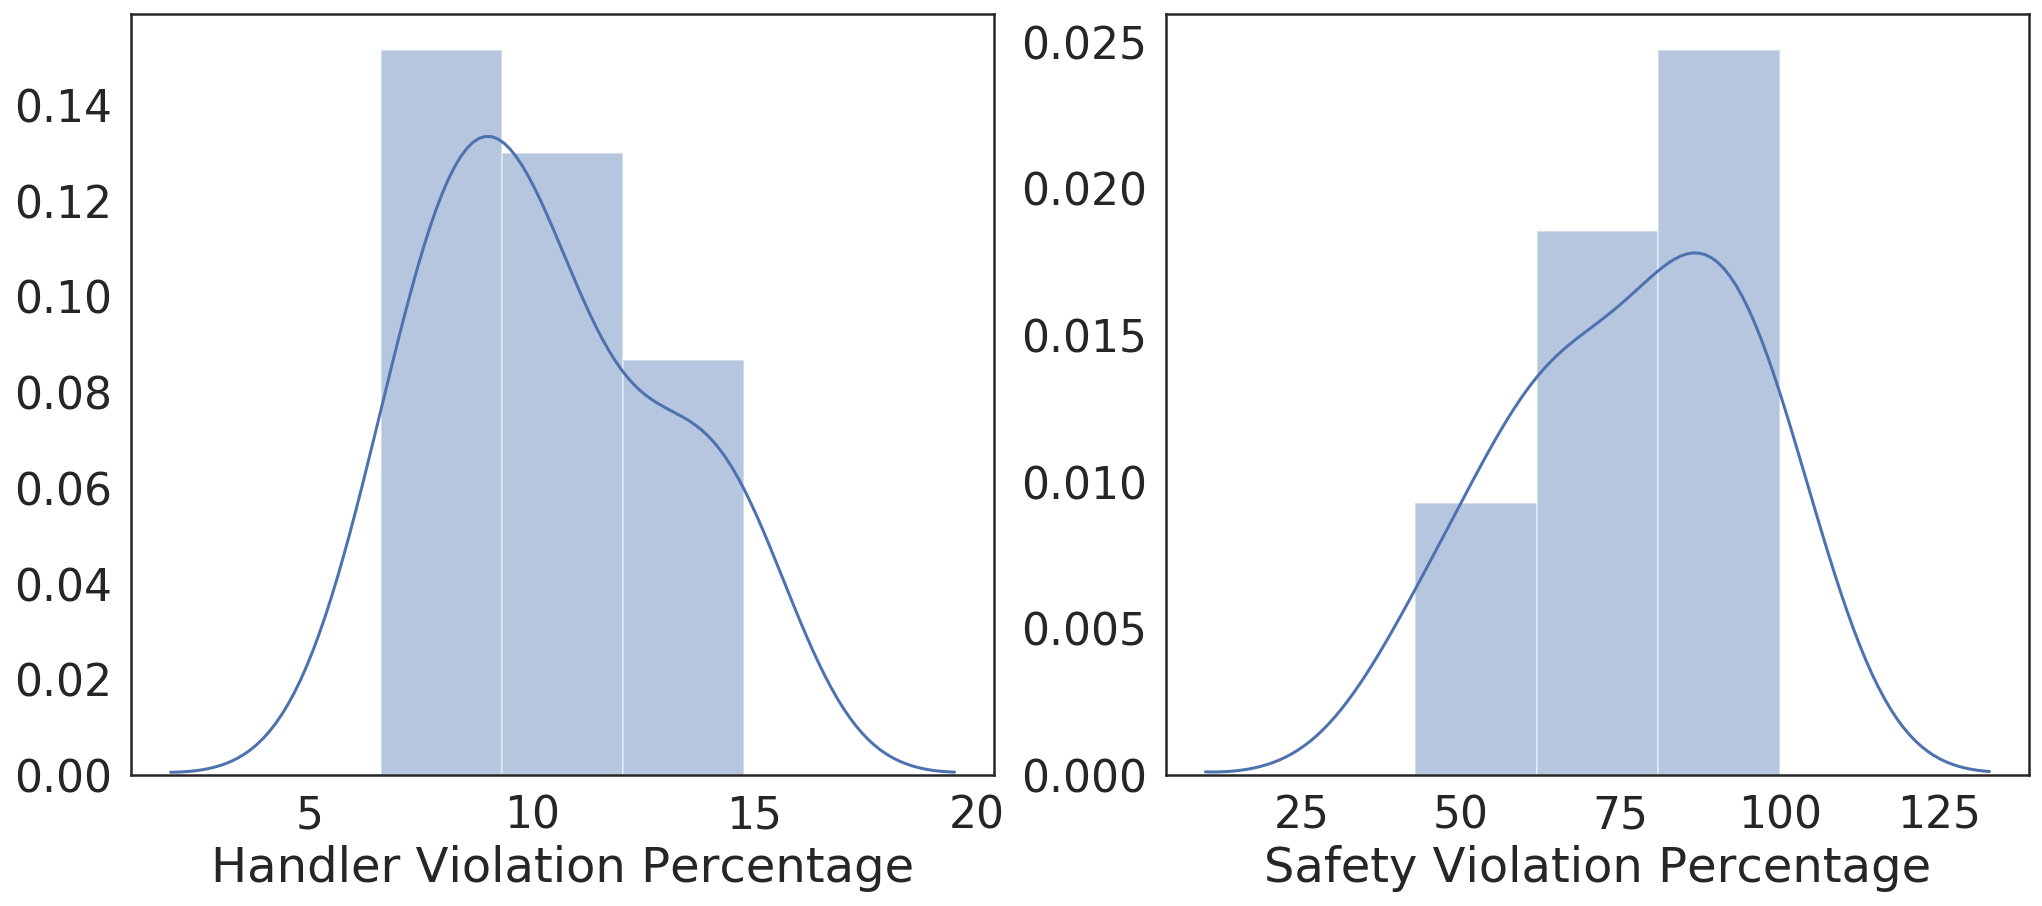

In [99]:
plt.subplot(1, 2, 1)
sns.distplot(df['handler_violation_percentage'])
plt.xlabel('Handler Violation Percentage')

plt.subplot(1, 2, 2)
sns.distplot(df['safety_violation_percentage'])
plt.xlabel('Safety Violation Percentage');

Does not look exactly normal but we can use a more formal normal test.

In [100]:
h_handler = df['handler_violation_percentage'].values
h_food = df['safety_violation_percentage'].values
st_handler, p_handler = normaltest(h_handler)
st_food, p_food = normaltest(h_food)

if p_handler < 0.01:
    print("Handler violation percentage not normal.")
else:
    print("Handler violation percentage normal.")
    
if p_food < 0.01:
    print("Safety violation percentage not normal.")
else:
    print("Safety violation percentage normal.")

Handler violation percentage normal.
Safety violation percentage normal.


Normal test indicates it is normal enough using an alpha value of 0.01. Appears to be a multivariate normal probability distribution. Since not closely correlated, also not multicollinear and not auto-correlated. This means we can use regression to analyze the relationship.

# Data Analysis & Results

To explore the relationship between handler violation and safety violation, we can graph the percentages over time in a line plot to see if they follow a similar trend of increase and decrease.

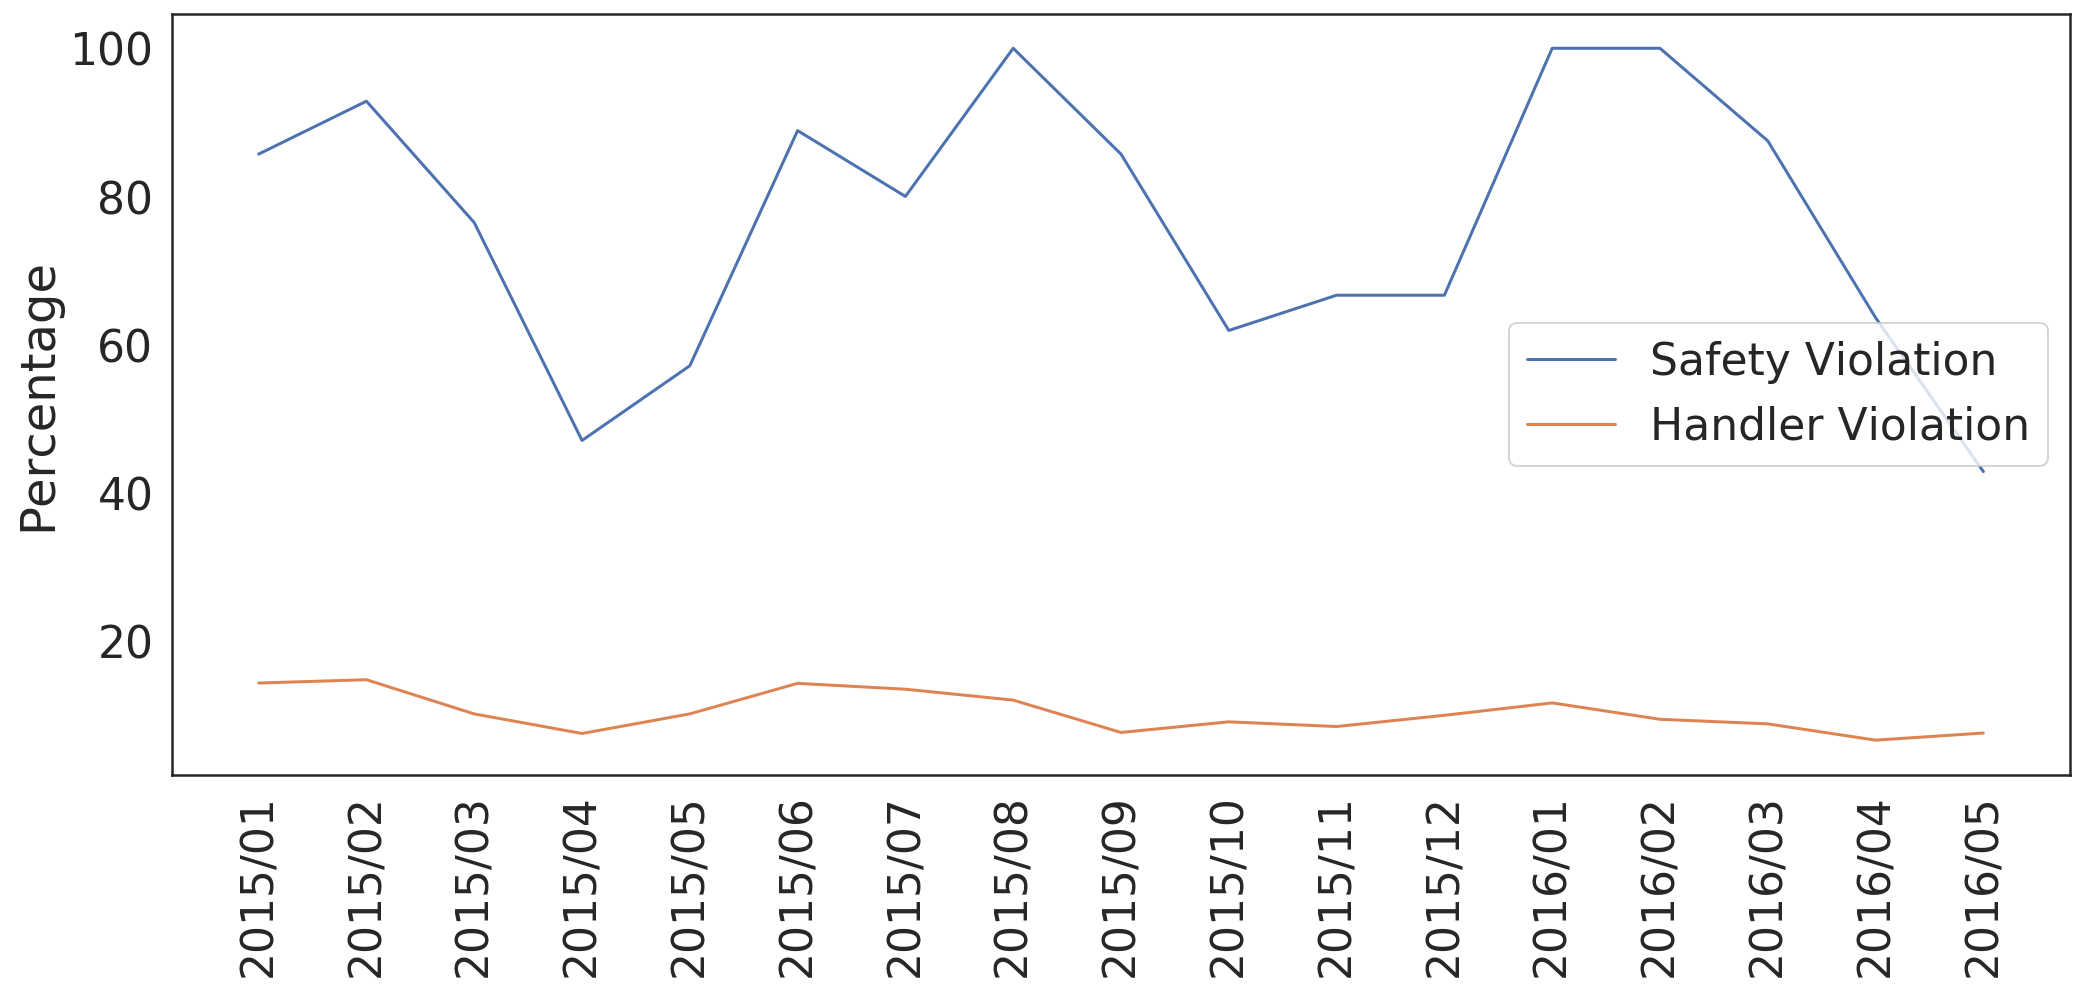

In [101]:
g = sns.lineplot(df.index,df['safety_violation_percentage'],label='Safety Violation')
g= sns.lineplot(df.index,df['handler_violation_percentage'],label='Handler Violation')
plt.ylabel('Percentage')
plt.xticks(df.index,rotation=90)
g.set(xticklabels=["2015/01","2015/02","2015/03","2015/04","2015/05","2015/06","2015/07","2015/08","2015/09","2015/10","2015/11","2015/12","2016/01","2016/02","2016/03","2016/04","2016/05"])
plt.legend()

Because of the scale and handler violation percentage is very low, it is impossible to discern the pattern of handler violation, and compare it to the pattern of safety violation. We can blow up the scale of handler violation so we can better compare if they share a trend, and potentially have a relationship.

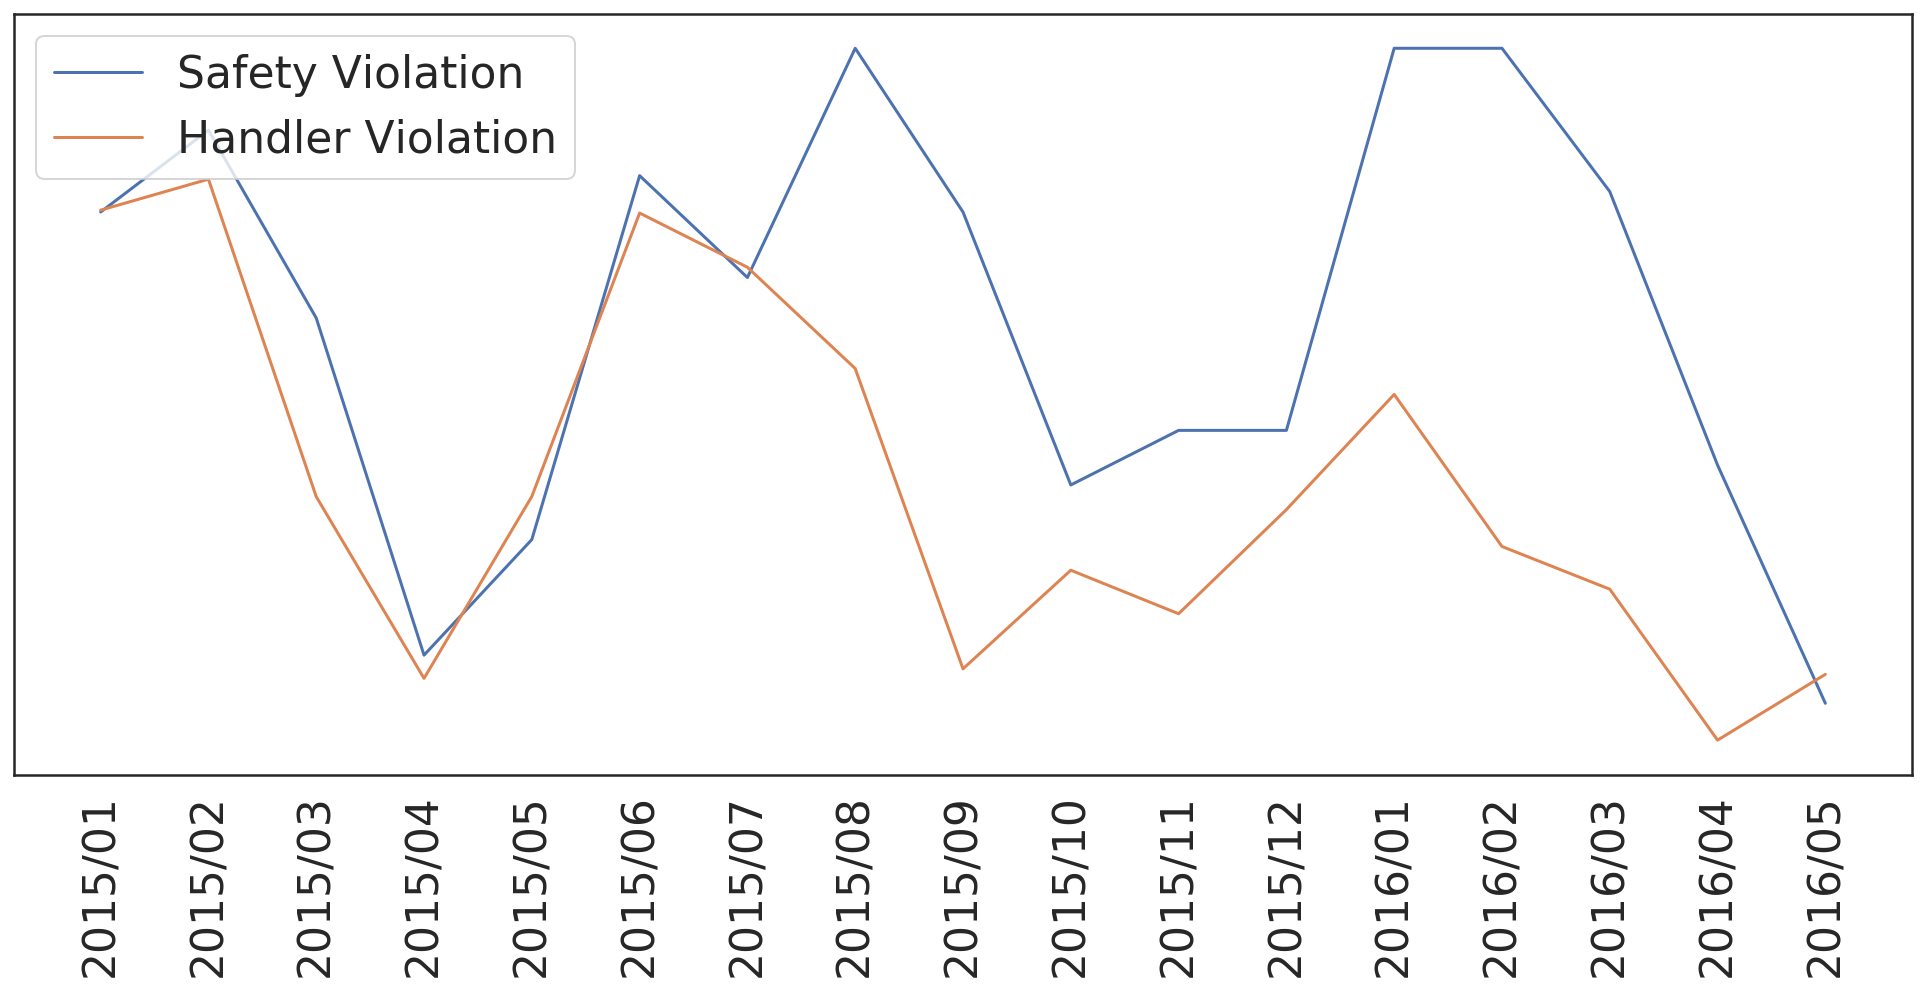

In [102]:
g = sns.lineplot(df.index,df['safety_violation_percentage'],label='Safety Violation')
g = sns.lineplot(df.index,df['handler_violation_percentage']*6,label='Handler Violation')
plt.xticks(df.index,rotation=90)
g.set(xticklabels=["2015/01","2015/02","2015/03","2015/04","2015/05","2015/06","2015/07","2015/08","2015/09","2015/10","2015/11","2015/12","2016/01","2016/02","2016/03","2016/04","2016/05"])
plt.legend()
g.axes.get_yaxis().set_visible(False)

The two lineplots seem to follow a similar pattern, which seems to tell us that the number of handler violations and the number of safety violations have a relationship.

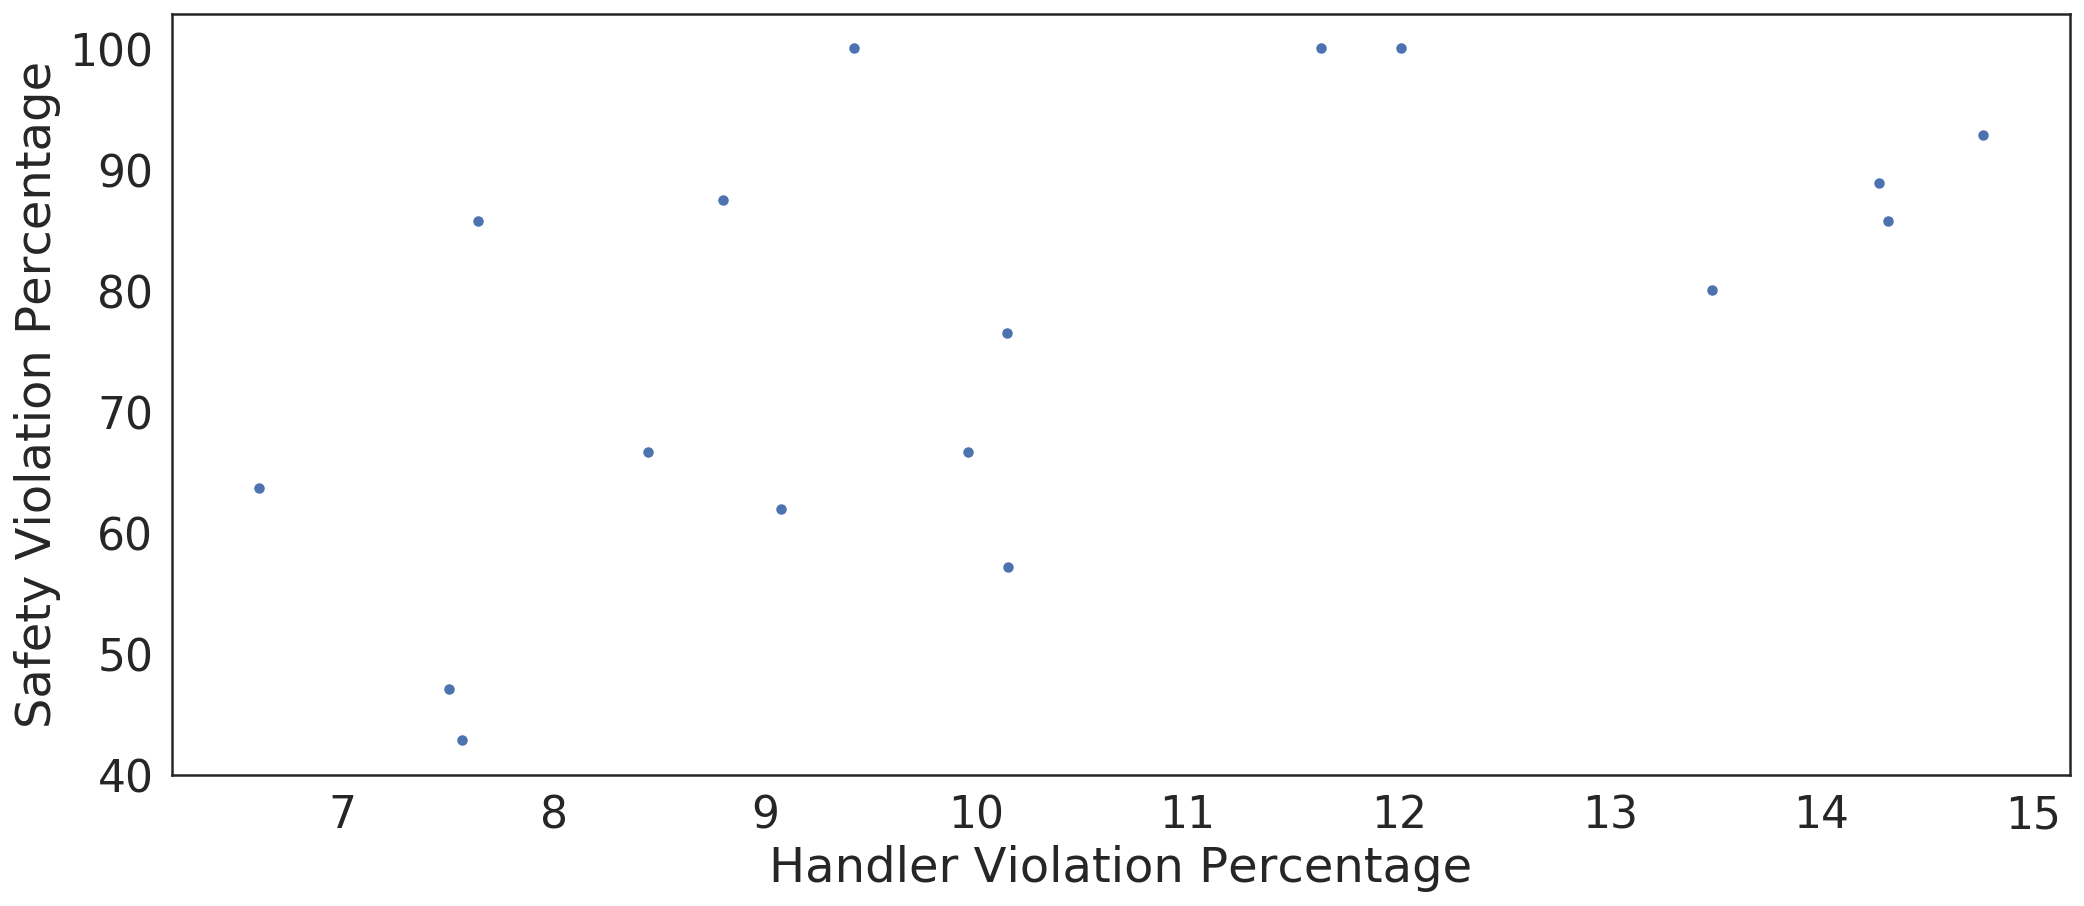

In [103]:
sns.scatterplot(x=df['handler_violation_percentage'],y=df['safety_violation_percentage'])
plt.xlabel('Handler Violation Percentage')
plt.ylabel('Safety Violation Percentage');

The distribution of my variables are both normal, which we were able to conclude by doing a normal test with an alpha value of 0.1. If we look at the scatterplot we previously created, it does not appear there are any outliers. The relationship between variables seems to be linear from the scatterplot.

The scatterplot of safety violation percentage plotted against handler violation percentage seems to have a linear relationship. This would seem to indicate that there is some kind of relationship between handler violation percentage and safety violation percentage. Since it seems to be linearly related, we can perform linear regression. We use linear regression because the relationship appears to be linear. Linear regression test will allow us to assess if that relationship is significant.

H<sub>0</sub>: There is no relationship between handler violation percentage and safety violation percentage.

H<sub>a</sub>: There is a relationship between handler violation percentage and safety violation percentage.

In [104]:
outcome, predictors = patsy.dmatrices('safety_violation_percentage ~ handler_violation_percentage', df)

In [105]:
mod = sm.OLS(outcome, predictors)

In [106]:
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:     safety_violation_percentage   R-squared:                       0.335
Model:                                     OLS   Adj. R-squared:                  0.291
Method:                          Least Squares   F-statistic:                     7.554
Date:                         Wed, 10 Jun 2020   Prob (F-statistic):             0.0149
Time:                                 17:35:54   Log-Likelihood:                -69.505
No. Observations:                           17   AIC:                             143.0
Df Residuals:                               15   BIC:                             144.7
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Our results seem to indicate that there is indeed a meaningful and significant relationship between handler violation and safety violation. For every 1% increase in handler violation, there is a 4.01% increase in safety violation. The p-value is 0.015. Using an alpha value of 0.05, we can reject the null hypothesis, and conclude that there is a relationship between handler violations percentage and safety violation percentage.

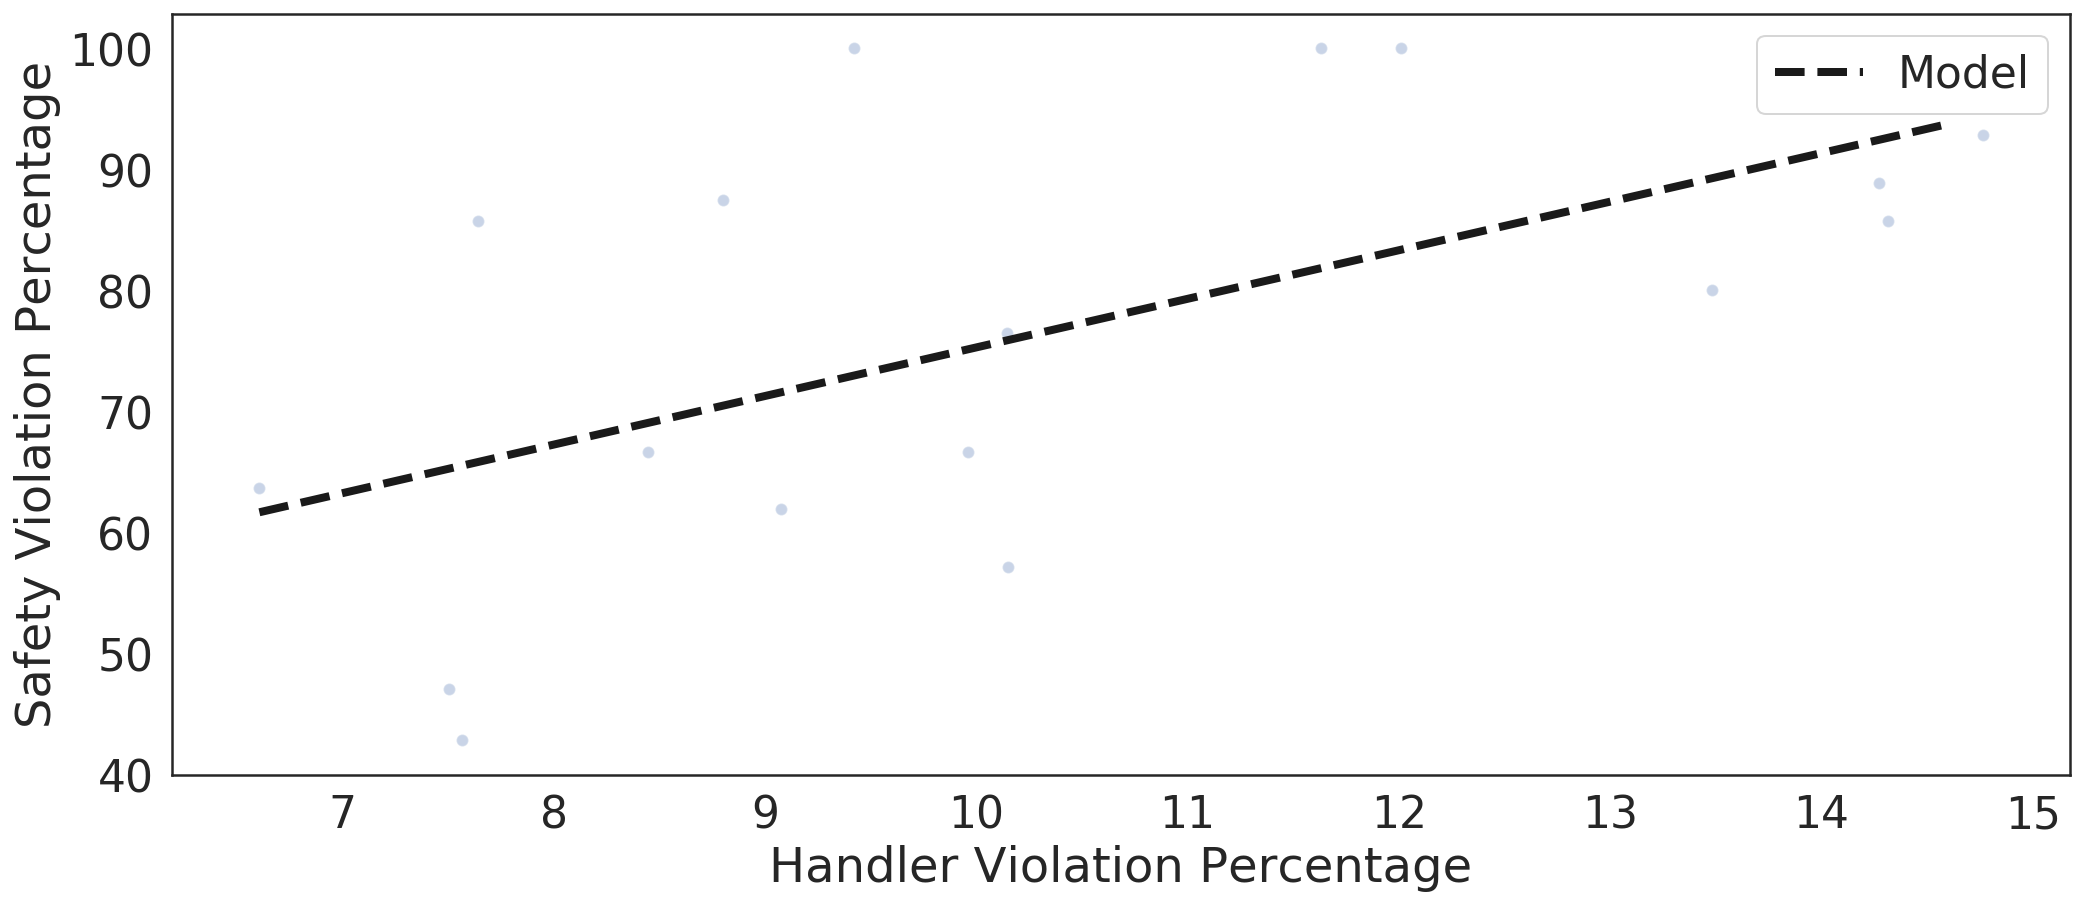

In [107]:
# Plot the orginal data (as before)
sns.scatterplot(x='handler_violation_percentage', y='safety_violation_percentage', alpha=0.3, data=df)

# Generate and plot the model fit line
xs = np.arange(df['handler_violation_percentage'].min(), df['handler_violation_percentage'].max())
ys = 4.0142 * xs + 35.1394
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Handler Violation Percentage')
plt.ylabel('Safety Violation Percentage')
plt.legend();

# Ethics & Privacy

I have clearly ran into problems accessing the former database of safety inspections because prior permission needs to be sought out to get the complete database. In that regard, I did not have permission to use the data of food safety inspection because I had to sought out a third-party sample that had been collected in the past. I did not ask for permission to use this data from this third-party source. There are no privacy concerns regarding the datasets that I need to deal with or comply with because it contains no private information about the restaurants, any food handlers, or any inspectors. 

There are potential biases in the dataset since they are many other factors other than food safety knowledge that come into play when it comes to the number of safety violations that a restaurant infracts. It goes without saying that a restaurant's size plays a large part in their food safety practices. A chain restaurant like McDonalds is more likely to have better food safety practices than a local restaurant due to standardized and must-kept chain requirements. The fact that a restaurant is a cheap-eats or high-end also plays a part in the level of food safety knowledge. A high-end restaurant is more likely to be kept up to high food safety standards than a cheap-eats restaurants solely due to fact that they have more funds to work with. A high-end restaurant would dedicate more funds to make sure its food handlers are certified. Therefore, its possible the economic status of a restaurant can act as a counfounding variable for the number of safety violations and handler violations recorded in a time period. It is important to keep in mind that food handler inspections and food safety inspections are usually conducted together; safety inspection for the restaurant and handler inspection for every employee working at said restaurant. Suppose this month, the FHD inspeced more expensive restaurants. They have a very few number of handler and safety violations. Next month, the FHD inspects more cheap restaurants, which racks up more handler and safety violations. The relationship can appear between handler and safety violations even when there isn't one.

A potential way to resolve this bias is to further categorize these violations in San Diego County based on size and cost of the restaurants they happened in. We would analyze the relationship between handler violation percentage and safety violation percentage for small, mid, and large size restaurants. This would allow us to compare the food safety of restaurants in the same size and cost scale, so that we can better visualize the actual relationship without the confounding variable of size. However, due to the limited dataset I could get my hands on, I could not find a dataset that had a feature of the restaurant that was being inspected.

# Conclusion & Discussion

Looking at the lineplot, as well as the linear regression test, we can conclude that there is a meaningful and significant relationship between food handler violation percentage and food safety violation percentage. As food handler violation percentage increases, food safety violation percentage increases as well. Therefore, it would seem like my initial hypothesis is incorrect about how there would be no sigificiant relationship between the two.

However, I believe there are some siginificant limitations in my projects. We still cannot definitively say that these food handler training helps to decrease food safety violations. As well as the previous bias that was addressed, it can simply be the case that food handlers who have a lack of concern to maintain their accrediation, have a lack of concern altogether to prepare food in a safe manner. If that is the case, our results are counfounded by an altogether lack of concern people may have. Another limitation of my project is the sample size of the data I had access to. I had too few inspections that I could make use of, and result of my analysis could be different elsewise if I had access to more safety inspections.

With regards to the impact of my work on the society, my results seem to indicate that the current food handler training program enforced by the County of San Diego seems to be effective at preventing bad safety practices and reducing the amount of food safety violations. The more food handler violations, the more food handlers have not been accredited as having the necessary food safety knowledge, which seems to have a direct impact on the amount of unsafe practices of food preparation that are found in restaurants in the County of San Diego.